In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# vizualisation libraries
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Data Prepation

In [37]:
data = pd.read_csv('crop_recommendation.csv')

In [38]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [40]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Preprocessing

## check unique value

In [41]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [42]:
for x in range(len(data['label'].unique())) :
    ganti1 = {data['label'].unique()[x] : x}
    data['label'] = data['label'].replace(ganti1)
data
    

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21


In [43]:
data['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)

## Check Outlier

d:\anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\anaconda\anaconda3\lib\site-packages\

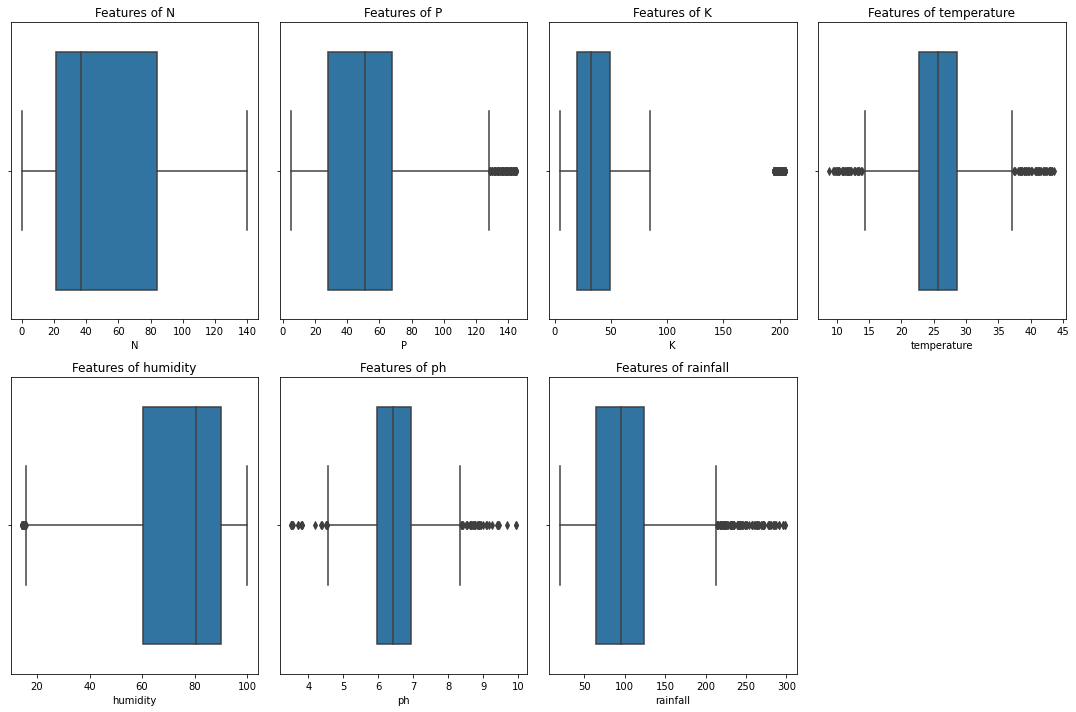

In [44]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[col])
    plt.title(f'Features of {col}')
plt.tight_layout()
plt.show()

## Vizualization

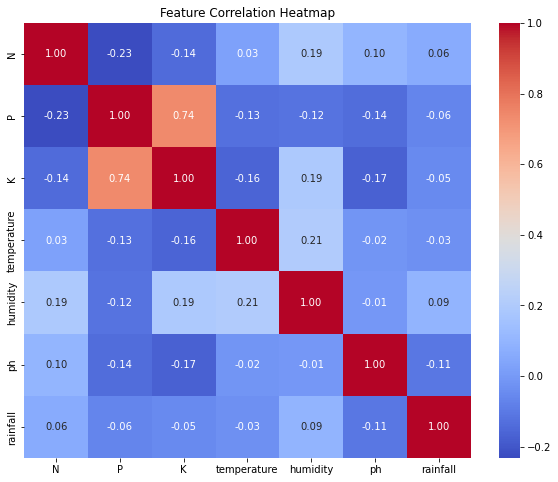

In [45]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [46]:
list1 = [x for x in data]
list1.remove('label')
list1

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

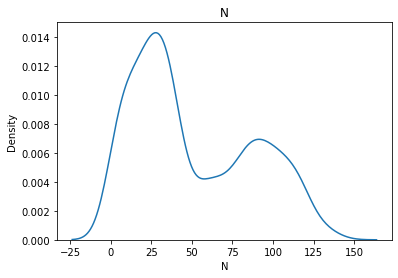

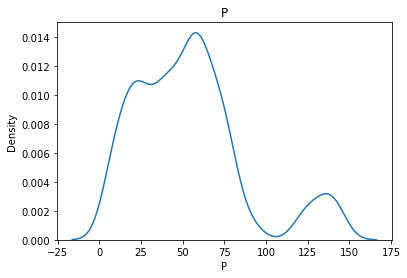

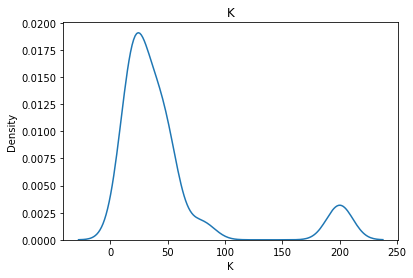

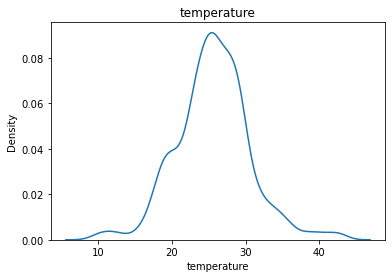

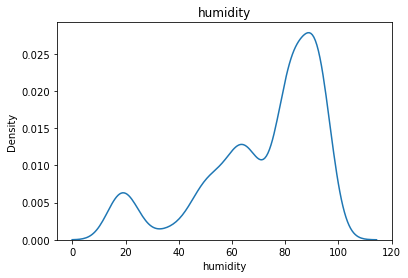

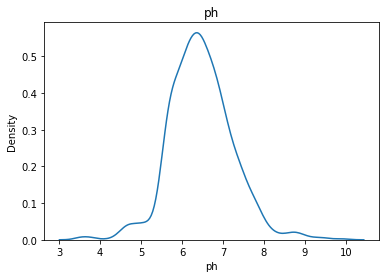

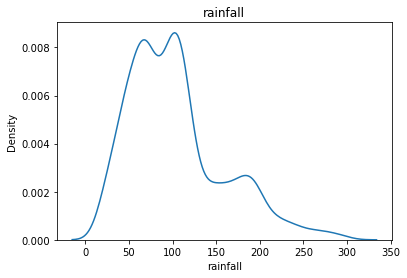

In [47]:
for x in list1 :
    sns.kdeplot(data[x])
    plt.title(x)
    plt.show()

# Feature Selection

In [48]:
Train_set, Val_set = train_test_split(data, test_size=0.2, random_state=40)
Test_set, Val_set = train_test_split(Val_set, test_size=0.5, random_state=40)

In [49]:
X_train, y_train = Train_set.drop(columns=['label']), Train_set['label']
X_val, y_val = Val_set.drop(columns=['label']), Val_set['label']
X_test, y_test = Test_set.drop(columns=['label']), Test_set['label']

# ML Models

In [50]:
tanaman = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

## Xgboost

In [51]:
%pip install xgboost

In [52]:
import xgboost as xgb

In [53]:
import xgboost as xgb
# Create the XGBoost model
model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
    
# Train the model
XG_model = model.fit(X_train, y_train)

d:\anaconda\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:09:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [54]:
from sklearn.metrics import classification_report

# Prediksi label
y_pred = XG_model.predict(X_test)

# Tampilkan classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        14
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00        11
   

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
# Training accuracy
y_train_pred = model.predict(X_train)
train_akurasi = accuracy_score(y_train, y_train_pred)

# Validation accuracy
y_validation_predic = model.predict(X_val)
valid_accuracy = accuracy_score(y_val, y_validation_predic)

print(f"Training Accuracy: {train_akurasi}")
print(f"Validation Accuracy: {valid_accuracy}")

Training Accuracy: 1.0
Validation Accuracy: 1.0


In [56]:
import joblib
# Save the model
joblib.dump(XG_model, "XG_model.pkl")
print("Model saved as XG_model.pkl")

Model saved as XG_model.pkl


## Catboost

In [57]:
%pip install catboost

In [58]:
catboost.CatBoostClassifier?

Object `catboost.CatBoostClassifier` not found.


In [59]:
from catboost import CatBoostClassifier

# Buat model CatBoost
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)

# Latih model
catboost_model = model.fit(X_train, y_train)
catboost_model

In [60]:
from sklearn.metrics import classification_report

# Prediksi label
y_pred = catboost_model.predict(X_test)

# Tampilkan classification report
report = classification_report(y_test, y_pred)
print("Classification Report Catboost:\n")
print(report)


Classification Report Catboost:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        14
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00     

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
# Training accuracy
y_train_pred = catboost_model.predict(X_train)
train_akurasi = accuracy_score(y_train, y_train_pred)

# Validation accuracy
y_validation_predic = catboost_model.predict(X_val)
valid_accuracy = accuracy_score(y_val, y_validation_predic)

print(f"Training Accuracy: {train_akurasi}")
print(f"Validation Accuracy: {valid_accuracy}")


Training Accuracy: 0.9977272727272727
Validation Accuracy: 0.990909090909091


In [62]:
import joblib
# Save the model
joblib.dump(catboost_model, "catboost.pkl")
print("Model saved as catboost.pkl")

Model saved as catboost.pkl


## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Buat model Random Forest
model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
model_rf = model1.fit(X_train, y_train)
model_rf


RandomForestClassifier(random_state=42)

In [68]:
model1

RandomForestClassifier(random_state=42)

In [64]:
from sklearn.metrics import classification_report

# Prediksi label
y_pred = model_rf.predict(X_test)

# Tampilkan classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        14
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00        11
   

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
# Training accuracy
y_train_pred = model_rf.predict(X_train)
train_akurasi = accuracy_score(y_train, y_train_pred)

# Validation accuracy
y_validation_predic = model_rf.predict(X_val)
valid_accuracy = accuracy_score(y_val, y_validation_predic)

print(f"Training Accuracy: {train_akurasi}")
print(f"Validation Accuracy: {valid_accuracy}")

Training Accuracy: 1.0
Validation Accuracy: 1.0


In [66]:
import joblib
# Save the model
joblib.dump(model_rf, "model_rf.pkl")
print("Model saved as model_rf.pkl")

Model saved as model_rf.pkl


In [67]:
import numpy as np

# Input sebagai array 1D
float_features = [90, 43, 455, 294.872, 711, 71.6, 2120]
features = np.array(float_features).reshape(1, -1)  # Mengubah menjadi 2D array

# Prediksi
prediction = model.predict(features)
print(prediction)  # Menampilkan prediksi


[[17]]
